les classes necessaire pour faire le traitement d'image:

In [1]:
#! pip install matplotlib
#! pip install scikit-image
#! pip install numpy
#! pip install pillow

defini tout les classes et les fct nécessaire pour notre projet


In [2]:
from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt 
from skimage.color import rgb2gray
import glob
from skimage.io import imread
import numpy as np

matplotlib: pour tracer des graphes
skimage: pour afficher des images, La plupart des formats d'image stockent les valeurs des pixels sous forme d'entiers; le format le plus classique correspond à des entiers codés sur 8 bits (entre 0, et 255)
blob_dog, blob_log, blob_doh: Trouve les taches dans l'image en niveaux de gris donnée.
glob: est une instruction Python qui l'informe que la variable a qui est utilisée à l'intérieur de la fonction est la même que celle qui est définie à l'extérieur de la fonction

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


nécessaire pour lire les donné du google MyDrive

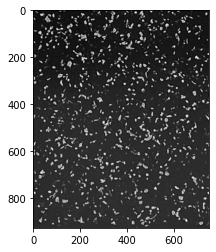

In [4]:
image_name1 = "impact test.jpg"
image_name2 = "day-image.jpg"
image_name3 = "test.jpg"
image_name4 = "test3.jpg"
image_name5 = "tiger.jpg"
image_name6 = "test4.jpg"
file_name = "/content/172.jpg"
im= imread(file_name, as_gray= True)
plt.imshow(im, cmap= plt.cm.gray)
plt.show()

imread: c'est pour lire l'image (image_name4) et le mettre dans l'object im
imshow: pour voire l'image sur l'ecran
camp= plt.cm.gray: pour faire l'image un peux gris et sa nécessaire car le blob_dog, blob_log, blob_doh fctionnent mieux si l'images est gris

In [5]:
blobs_log = blob_log(im, max_sigma=30, num_sigma=10, threshold= 0.1)

In [6]:
blobs_doh = blob_doh(im, max_sigma=100, num_sigma=50, threshold=0.1)

In [7]:
blobs_dog = blob_dog(im, max_sigma=30,sigma_ratio=9, threshold=0.2)

blob_log(im, max_sigma=30, num_sigma=10, threshold= 0.1): Trouve des blobs dans l'image en niveaux de gris donnée.

Les blobs sont trouvés en utilisant la méthode Laplacian of Gaussian (LoG) [1]_.
Pour chaque blob trouvé, la méthode retourne ses coordonnées et le standard
déviation du noyau gaussien qui a détecté le blob.

In [ ]:
blobs_log[: 2] = blobs_log[: 2] * sqrt(2)
num_rows = len(blobs_log)
print("nombre des impact", num_rows)

nombre des impact 1085


In [ ]:
blobs_log.shape, blobs_dog.shape, blobs_doh.shape

((1085, 3), (760, 3), (0, 3))

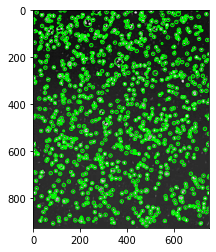

In [ ]:
from skimage import color
fig, ax = plt.subplots(1,1)
plt.imshow(im, cmap= plt.cm.gray)

for blob in blobs_log:
  y, x, r = blob
  c = plt.Circle((x,y), r + 3, color = 'lime', linewidth = 1, fill = False)
  ax.add_patch(c)
'''
for blob in blobs_dog:
  y, x, r = blob
  c = plt.Circle((x, y), r + 3, color = 'lime', linewidth=1, fill = False)
  ax.add_patch(c)
'''
for blob in blobs_doh:
  y, x, r = blob
  c = plt.Circle((x, y), r + 3, color = 'lime', linewidth=1, fill = False)
  ax.add_patch(c)
plt.show()

In [ ]:
im.shape

(391, 329)

In [ ]:
import math
sp = int(im.shape[0]) * int(im.shape[1])
div = (80 * 80) / sp
echelle = math.sqrt(div)

In [ ]:
surface = []

for blob in blobs_log:
  _,_, r = blob
  aire = 3.14 * r*r * echelle*echelle
  surface.append(aire)

In [ ]:
surface[0]

0.3124402397406697

In [ ]:
clist = [0.85, 1.20, 1.70, 3.30, 6.30]
csylist = [1, 2, 3, 4, 5]
cotation_list = []
length = len(surface)
i = 0
j = 1
while i < length:
  s = 0
  while s < len(clist):
    if surface[i] < clist[s]:
      cotation_list.append(csylist[s])
      break
    s += 1
  if surface[i] > clist[-1]:
    cotation_list.append(6)
  i += 1
  j += 1


In [ ]:
cotation_array = np.array(cotation_list)

In [ ]:
unique, counts = np.unique(cotation_array, return_counts=True)
cotation_symbole ='E'
length = len(unique)
if length == 1:
    cotation_number = unique[length - 1]
    if counts[length - 1] <= 9:
        cotation_symbole = 'A'
    elif 9 < counts[length - 1] <= 24:
        cotation_symbole = 'B'
    elif 24 < counts[length - 1] <= 74:
        cotation_symbole = 'C'
    elif 74 < counts[length - 1] <= 150:
        cotation_symbole = 'D'
    elif 150 < counts[length - 1]:
        cotation_symbole = 'E'
elif length == 0:
    print(0)
else:
    if counts[-1] < 74:
        cotation_number = unique[length-2]
        if counts[length-2] <= 9:
            cotation_symbole = 'A'
        elif 9 < counts[length-2] <= 24:
            cotation_symbole = 'B'
        elif 24 < counts[length-2] <= 74:
            cotation_symbole = 'C'
        elif 74 < counts[length-2] <= 150:
            cotation_symbole = 'D'
        elif 150 < counts[length-2]:
            cotation_symbole = 'E'
        else:
            cotation_number = unique[-1]
            if 74 < counts[-1] <= 150:
                cotation_symbole = 'D'
            elif 150 < counts[-1]:
                cotation_symbole = 'E'

In [ ]:
cotation_symbole, cotation_number

('E', 1)

In [ ]:
blobs_log[0][2]

15.084944665313014

In [ ]:
import cv2
import numpy as np

In [ ]:
# Read image
img = cv2.imread("/content/drive/MyDrive/picture/test3.jpg", cv2.IMREAD_GRAYSCALE)

In [ ]:
blank = np.zeros((1,1))

In [ ]:
detector = cv2.SimpleBlobDetector_create()
print(1)

1


In [ ]:
# Detect blobs from the image.
keypoints = detector.detect(img)

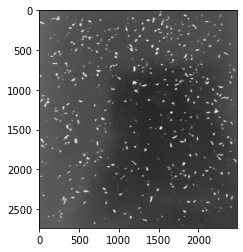

In [ ]:
blobs = cv2.drawKeypoints(img, keypoints, blank, (0,255,255), cv2.DRAW_MATCHES_FLAGS_DEFAULT)
plt.imshow(blobs, cmap= plt.cm.gray)
plt.show()

577


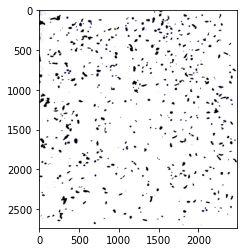

In [ ]:
import cv2
import numpy as np

image = cv2.imread("/content/drive/MyDrive/picture/test3.jpg", 0)
ret, image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY_INV)
params = cv2.SimpleBlobDetector_Params()

params.filterByArea = True
params.minArea = 1
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(image)
print(len(keypoints))
blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 0, 255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(blobs, cmap= plt.cm.gray)
plt.show()

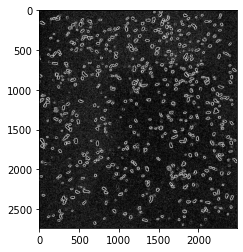

In [ ]:
im = cv2.imread("/content/drive/MyDrive/picture/test3.jpg", 0)
im = cv2.adaptiveThreshold(im,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,11,2)
img = np.array(im)
#im = cv2.convertScaleAbs(im)
#plt.imshow(im)
#plt.show()
img.shape
plt.imshow(img,cmap=plt.cm.gray)
plt.show()

In [ ]:
contours1, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
len(contours1)

189893

In [ ]:
def centrefct(cnt):
    M = cv2.moments(cnt)
    if M['m00'] == 0:
        cx = int(M['m10'] / (M['m00'] + 1))
        cy = int(M['m01'] / (M['m00'] + 1))
    else:
        cx = int(M['m10'] / (M['m00']))
        cy = int(M['m01'] / (M['m00']))
    center = (cx, cy)
    return center

In [ ]:
i = 0
area_List = []
perimetre_list = []
listx = []
listy = []
test_list = []
test_list1 = []

for cnt in contours1:
    area = cv2.contourArea(cnt)
    if not area <= 20:
      epsilon = 0.000001 * cv2.arcLength(cnt, True)
      approx = cv2.approxPolyDP(cnt, epsilon, True)
      cv2.drawContours(img, [approx], 0, (255, 255, 255), 1)
      center = centrefct(cnt)
      center0 = (center[0], center[1])

      area_List.insert(i, area)

      i += 1
      perimetre = cv2.arcLength(cnt, True)  # divisé par scale pour calculer le vrai perimetre du contour
      perimetre_list += [perimetre]
      # pour calculer les vrais coordonnes des contours dans l'image et le metre dans une list
      listx += [center[0]]
      listy += [center[1]]
      test_list1 += [i, center0, area, perimetre]
      test_list += ["numero d'impact: " + str(i), " coordonnes d'impact= " + str(center0), "area= " + str(area), "perimetre= " + str(perimetre)]

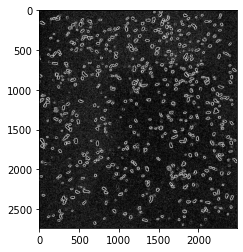

In [ ]:
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [ ]:
len(area_List)

681

In [ ]:
from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt 
from skimage.color import rgb2gray
import glob
from skimage.io import imread
import numpy as np

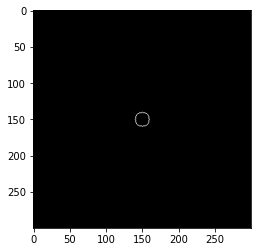

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

blank = np.zeros((300, 300, 3), dtype = np.uint8)

cv2.circle(blank, (150, 150), 10, (255, 255, 255), thickness=1, lineType=8, shift=0)

plt.imshow(blank)
plt.show()

In [ ]:
blobs_log_t = blob_log(blank, max_sigma=30, num_sigma=10, threshold= 0.1)

In [ ]:
blobs_log_t.shape

(27, 4)

In [ ]:
blobs_log_t[: 2] = blobs_log_t[: 2] * sqrt(2)
num_rows = len(blobs_log_t)
print("nombre des impacts", num_rows)

nombre des impact 27


In [ ]:
blobs_log_t[0]

array([207.88939367, 224.85995642,   0.        ,   1.41421356])

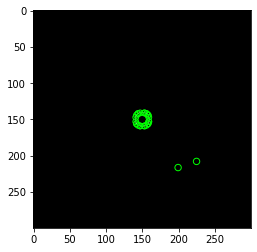

In [ ]:
from skimage import color
fig, ax = plt.subplots(1,1)
plt.imshow(blank, cmap= plt.cm.gray)
for blob in blobs_log_t:
  y, x,_, r = blob
  c = plt.Circle((x,y), r + 3, color = 'lime', linewidth = 1, fill = False)
  ax.add_patch(c)
plt.show()